In [1]:
import torch
import numpy as np

In [11]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [2]:
def model(t_u, w, b):
  return w*t_u+b

In [13]:
def loss_fn(t_p, t_c):
  squred_diffs = (t_p-t_c)**2
  return squred_diffs.mean()

In [17]:
params = torch.tensor([1.0,0.0], requires_grad=True)

In [18]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

In [19]:
params.grad

tensor([4517.2969,   82.6000])

image.png

In [22]:
if params.grad is not None:
  params.grad.zero_()    

In [23]:
params.grad

tensor([0., 0.])

In [30]:
# 자동미분을 적용한 훈련 코드
n_epochs = 10
learning_rate = 0.01
def training_loop(n_epoch, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epoch+1):
    if params.grad is not None:  # backward 호출전에 적용
      params.grad.zero_()
    
    t_p = model(t_u, *params)
    loss = loss_fn(t_p,t_c)
    loss.backward()

    with torch.no_grad():
      params -= learning_rate*params.grad # 파라메터 조정    
    if epoch % 500 == 0:
      print(f"epoch:{epoch} loss : {float(loss)}")
  return params


In [35]:
training_loop(n_epoch=5000,learning_rate=0.01,params = torch.tensor([1.0,0.0], requires_grad=True),
    t_u=t_un, t_c=t_c)  # 마지막 t_u 를 정규화 하지 않으면 큰 값이 나와서 nan이 된다.

epoch:500 loss : 7.860115051269531
epoch:1000 loss : 3.828537940979004
epoch:1500 loss : 3.092191219329834
epoch:2000 loss : 2.957697868347168
epoch:2500 loss : 2.933133840560913
epoch:3000 loss : 2.9286484718322754
epoch:3500 loss : 2.9278297424316406
epoch:4000 loss : 2.9276793003082275
epoch:4500 loss : 2.927651882171631
epoch:5000 loss : 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

In [36]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

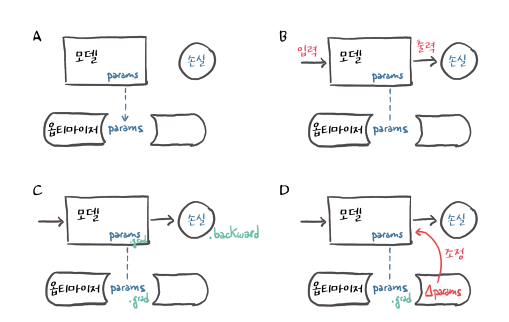

In [37]:
# 옵티마이져는 zero_grad() 와 step 이라는 두가지 메소드를 제공 
# zero_grad는 옵티마이저생성자에 전달된 파라미터의 모든 grad 속성을 0으로 만든다
# step은 옵티마이져별로 구현된 최적화 전략에 따라서 파라미터 값을 조정

In [38]:
# 경사하강 옵티마이저
params = torch.tensor([1.0,0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr = learning_rate)

In [39]:
t_p = model(t_u,*params)
loss = loss_fn(t_p,t_c)
loss.backward()

optimizer.step()

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)